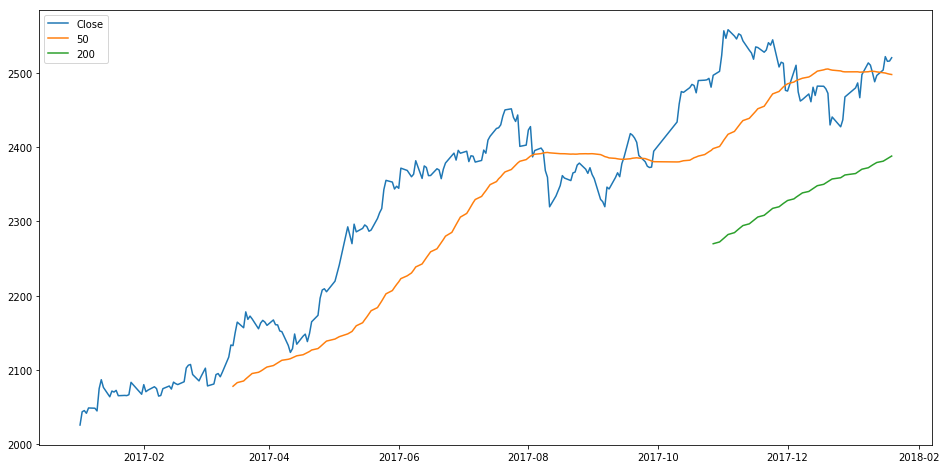

In [1]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import yahooFinance as yf

start_date = '2017-01-01'

df = pdr.DataReader('KRX:KOSPI', 'google', start_date)
df['SMA50'] = pd.Series(df['Close'].rolling(50).mean(), index=df.index) 
df['SMA200'] = pd.Series(df['Close'].rolling(200).mean(), index=df.index)

plt.figure(figsize=(16,8))
plt.plot(df.index,df[['Close','SMA50','SMA200']])
plt.legend(['Close','50','200'])
plt.show()

In [2]:
df = pdr.DataReader('^JKSE', 'yahoo', start_date)
df.head()

RemoteDataError: Unable to read URL: https://query1.finance.yahoo.com/v7/finance/download/^JKSE?interval=1d&period1=1483196400&crumb=UwtnByIzz%5Cu002Fx&events=history&period2=1516460399

In [ ]:
def get_stockmarket_data(market):
    df = pdr.DataReader(market['code'], market['ds'], start_date)
    #df['SMA50'] = pd.Series(df['Close'].rolling(50).mean(), index=df.index) 
    #df['SMA200'] = pd.Series(df['Close'].rolling(200).mean(), index=df.index)
    return df

'AxesSubplot' object does not support indexing
https://stackoverflow.com/questions/45993370/matplotlib-indexing-error-on-plotting?rq=1

In [ ]:
markets = [{'name':'KOSPI','code':'KRX:KOSPI','ds':'google'},
           {'name':'S&P 500','code':'^GSPC','ds':'yahoo'},
           {'name':'10year bonds','code':'^TNX','ds':'yahoo'},
           {'name':'DAX','code':'^GDAXI','ds':'yahoo'},
           {'name':'Nikkei 225','code':'^N225','ds':'yahoo'},
           {'name':'HANG SENG INDEX','code':'^HSI','ds':'yahoo'},
           {'name':'Jakarta Composite Index','code':'^JKSE','ds':'yahoo'}
          ]

f, axarr = plt.subplots(len(markets), figsize=(16,10), squeeze=False, sharex=False,ncols=2)
f.tight_layout()


row = 0; col = 0;idx = 0
for market in markets:
    market_data = get_stockmarket_data(market)
    #axarr[idx,0].plot(market_data.index, market_data[['Close','SMA50','SMA200']])
        
    if idx%2 == 0:
        col = 0
    else:
        col = 1
                
    axarr[row,col].plot(market_data.index, market_data['Close'])
    axarr[row,col].set_title(market['name'])
    #axarr[idx,0].legend(['Close','50','200'])
    print(row,col)
    idx = idx + 1
    
    if col == 1:
        col = 0
        row = row + 1        



In [5]:
df = yf.getSymbolData('^GSPC',sDate=(2017,1,1))
df.head()

TypeError: bad operand type for unary -: 'tuple'